In [10]:
import pandas as pd
import numpy as np
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# show a plot on jupyter notebook
%matplotlib inline

In [4]:
dataset = randn(25)
dataset

array([ 0.2594711 ,  0.77201361,  0.22441605, -0.29205794,  0.31661043,
       -1.24740716, -1.23019073, -1.87123611,  1.61539337,  0.05139126,
        0.75732277,  0.21076239,  1.66434349, -0.47973986,  0.75596318,
        1.62335669,  0.1057025 ,  0.92567415,  0.21540392,  0.44790969,
       -2.30899226, -0.78184485,  2.01988951,  0.07161834,  0.17797885])

<AxesSubplot:>

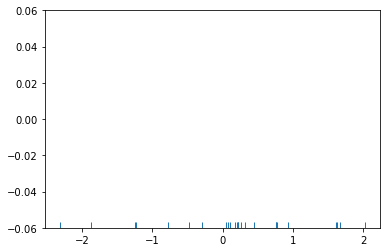

In [5]:
sns.rugplot(dataset)

<AxesSubplot:>

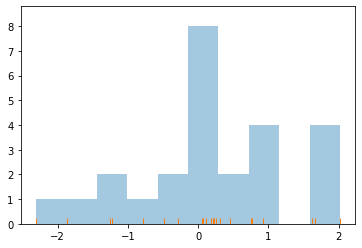

In [6]:
plt.hist(dataset,alpha = 0.4)
sns.rugplot(dataset)

In [7]:
sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
#     create a lernel for each point and append it to the kernel_list

kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
kernel_list.append(kernel)

# Scale for plotting

kernel = kernel / kernel.max()
kernel = kernel * 0.4

plt.plot(x_axis,kernel,color = 'grey',alpha = 0.5)

plt.ylim(0,1)


IndentationError: expected an indented block (3763204787.py, line 15)

(0.0, 1.0)

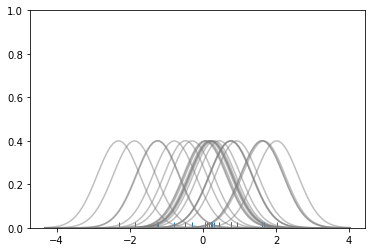

In [11]:
sns.rugplot(dataset);
 
# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2
 
# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)
  
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
 
 
# Create an empty kernel list
kernel_list = []
 
# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
 
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

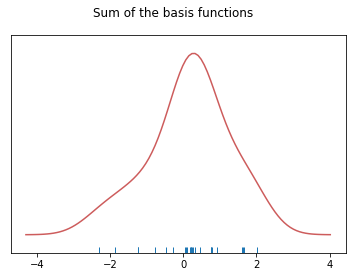

In [12]:
sum_of_kde = np.sum(kernel_list,axis = 0)

fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

# supplementay title
plt.suptitle("Sum of the basis functions")

<AxesSubplot:ylabel='Density'>

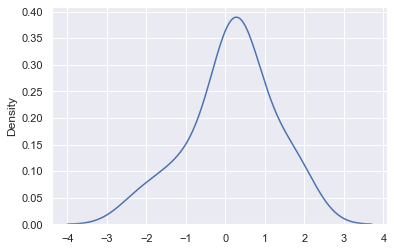

In [15]:
sns.set()
sns.kdeplot(dataset)

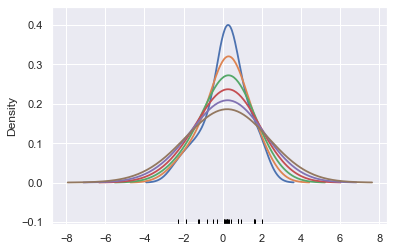

In [18]:
sns.rugplot(dataset,color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw_method = bw,lw = 1.8,
               label = bw)

/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian ke

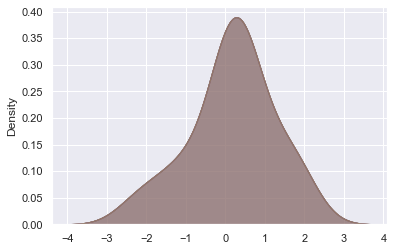

In [21]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel = kern,label = kern,
               shade = True)

<AxesSubplot:ylabel='Density'>

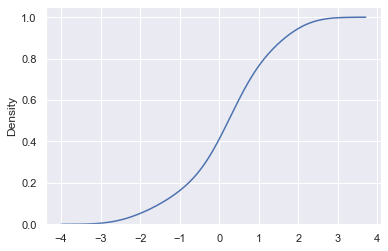

In [22]:
# cumulative graph
sns.kdeplot(dataset,cumulative = True)

<AxesSubplot:xlabel='X', ylabel='Y'>

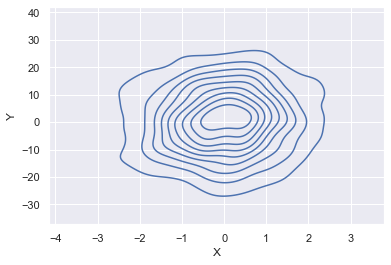

In [25]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns = ['X','Y'])

sns.kdeplot(data = dframe,
           x = 'X',
           y = 'Y')

/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

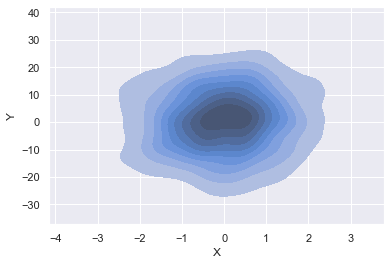

In [26]:
sns.kdeplot(dframe.X,dframe.Y,
           shade = True)

In [30]:
# ???
sns.kdeplot(dframe,bw_method = 'silverman')

ValueError: If using all scalar values, you must pass an index

/Users/ryotanaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


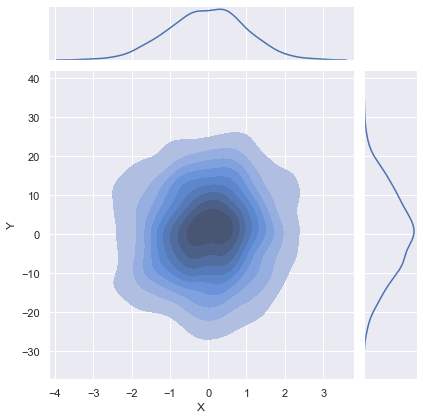

In [34]:
sns.jointplot('X','Y',dframe,kind = 'kde',
             shade = True)